# all_MLpackage


### Importing all the important packages

In [1]:
# for basic Data Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import xgboost as xgb
import plotly.express as px
from sklearn.datasets import load_breast_cancer

## All Machine learning model packages 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

## Read the Data 

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

id  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0   1         13.540           14.36             87.46        566.3   
1   2         13.080           15.71             85.63        520.0   
2   3          9.504           12.44             60.34        273.9   
3   4         13.030           18.42             82.61        523.8   
4   5          8.196           16.84             51.71        201.9   

   x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0            0.09779             0.08129           0.06664   
1            0.10750             0.12700           0.04568   
2            0.10240             0.06492           0.02956   
3            0.08983             0.03766           0.02562   
4            0.08600             0.05943           0.01588   

   x.concave_pts_mean  x.symmetry_mean  ...  x.texture_worst  \
0            0.047810           0.1885  ...            19.26   
1            0.031100           0.1967  ...            20.49   
2            0.020760           0.1815  ...            15.66   
3            0.029230           0.1467  ...            22.81   
4            0.005917           0.1769  ...            21.96   

   x.perimeter_worst  x.area_worst  x.smoothness_worst  x.compactness_worst  \
0              99.70         711.2             0.14400              0.17730   
1              96.09         630.5             0.13120              0.27760   
2              65.13         314.9             0.13240              0.11480   
3              84.46         545.9             0.09701              0.04619   
4              57.26         242.2             0.12970              0.13570   

   x.concavity_worst  x.concave_pts_worst  x.symmetry_worst  \
0            0.23900              0.12880            0.2977   
1            0.18900              0.07283            0.3184   
2            0.08867              0.06227            0.2450   
3            0.04833              0.05013            0.1987   
4            0.06880              0.02564            0.3105   

   x.fractal_dim_worst  diagnosis  
0              0.07259          B  
1              0.08183          B  
2              0.07773          B  
3              0.06169          B  
4              0.07409          B  

[5 rows x 32 columns]

In [5]:
print('Columns Present in the Breast Cancer dataset is:')
col_dict = {}
j = 1
for i in data.columns:
    col_dict[j] = i
    j += 1

col_dict

Columns Present in the Breast Cancer dataset is:


{1: 'id',
 2: 'x.radius_mean',
 3: 'x.texture_mean',
 4: 'x.perimeter_mean',
 5: 'x.area_mean',
 6: 'x.smoothness_mean',
 7: 'x.compactness_mean',
 8: 'x.concavity_mean',
 9: 'x.concave_pts_mean',
 10: 'x.symmetry_mean',
 11: 'x.fractal_dim_mean',
 12: 'x.radius_se',
 13: 'x.texture_se',
 14: 'x.perimeter_se',
 15: 'x.area_se',
 16: 'x.smoothness_se',
 17: 'x.compactness_se',
 18: 'x.concavity_se',
 19: 'x.concave_pts_se',
 20: 'x.symmetry_se',
 21: 'x.fractal_dim_se',
 22: 'x.radius_worst',
 23: 'x.texture_worst',
 24: 'x.perimeter_worst',
 25: 'x.area_worst',
 26: 'x.smoothness_worst',
 27: 'x.compactness_worst',
 28: 'x.concavity_worst',
 29: 'x.concave_pts_worst',
 30: 'x.symmetry_worst',
 31: 'x.fractal_dim_worst',
 32: 'diagnosis'}

###  Removing the id  column from the data

In [6]:
data.drop(['id'], axis=1, inplace=True)
data.head()

x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0         13.540           14.36             87.46        566.3   
1         13.080           15.71             85.63        520.0   
2          9.504           12.44             60.34        273.9   
3         13.030           18.42             82.61        523.8   
4          8.196           16.84             51.71        201.9   

   x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0            0.09779             0.08129           0.06664   
1            0.10750             0.12700           0.04568   
2            0.10240             0.06492           0.02956   
3            0.08983             0.03766           0.02562   
4            0.08600             0.05943           0.01588   

   x.concave_pts_mean  x.symmetry_mean  x.fractal_dim_mean  ...  \
0            0.047810           0.1885             0.05766  ...   
1            0.031100           0.1967             0.06811  ...   
2            0.020760           0.1815             0.06905  ...   
3            0.029230           0.1467             0.05863  ...   
4            0.005917           0.1769             0.06503  ...   

   x.texture_worst  x.perimeter_worst  x.area_worst  x.smoothness_worst  \
0            19.26              99.70         711.2             0.14400   
1            20.49              96.09         630.5             0.13120   
2            15.66              65.13         314.9             0.13240   
3            22.81              84.46         545.9             0.09701   
4            21.96              57.26         242.2             0.12970   

   x.compactness_worst  x.concavity_worst  x.concave_pts_worst  \
0              0.17730            0.23900              0.12880   
1              0.27760            0.18900              0.07283   
2              0.11480            0.08867              0.06227   
3              0.04619            0.04833              0.05013   
4              0.13570            0.06880              0.02564   

   x.symmetry_worst  x.fractal_dim_worst  diagnosis  
0            0.2977              0.07259          B  
1            0.3184              0.08183          B  
2            0.2450              0.07773          B  
3            0.1987              0.06169          B  
4            0.3105              0.07409          B  

[5 rows x 31 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [8]:
data.describe()

x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
count     569.000000      569.000000        569.000000   569.000000   
mean       14.127292       19.289649         91.969033   654.889104   
std         3.524049        4.301036         24.298981   351.914129   
min         6.981000        9.710000         43.790000   143.500000   
25%        11.700000       16.170000         75.170000   420.300000   
50%        13.370000       18.840000         86.240000   551.100000   
75%        15.780000       21.800000        104.100000   782.700000   
max        28.110000       39.280000        188.500000  2501.000000   

       x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
count         569.000000          569.000000        569.000000   
mean            0.096360            0.104341          0.088799   
std             0.014064            0.052813          0.079720   
min             0.052630            0.019380          0.000000   
25%             0.086370            0.064920          0.029560   
50%             0.095870            0.092630          0.061540   
75%             0.105300            0.130400          0.130700   
max             0.163400            0.345400          0.426800   

       x.concave_pts_mean  x.symmetry_mean  x.fractal_dim_mean  ...  \
count          569.000000       569.000000          569.000000  ...   
mean             0.048919         0.181162            0.062798  ...   
std              0.038803         0.027414            0.007060  ...   
min              0.000000         0.106000            0.049960  ...   
25%              0.020310         0.161900            0.057700  ...   
50%              0.033500         0.179200            0.061540  ...   
75%              0.074000         0.195700            0.066120  ...   
max              0.201200         0.304000            0.097440  ...   

       x.radius_worst  x.texture_worst  x.perimeter_worst  x.area_worst  \
count      569.000000       569.000000         569.000000    569.000000   
mean        16.269190        25.677223         107.261213    880.583128   
std          4.833242         6.146258          33.602542    569.356993   
min          7.930000        12.020000          50.410000    185.200000   
25%         13.010000        21.080000          84.110000    515.300000   
50%         14.970000        25.410000          97.660000    686.500000   
75%         18.790000        29.720000         125.400000   1084.000000   
max         36.040000        49.540000         251.200000   4254.000000   

       x.smoothness_worst  x.compactness_worst  x.concavity_worst  \
count          569.000000           569.000000         569.000000   
mean             0.132369             0.254265           0.272188   
std              0.022832             0.157336           0.208624   
min              0.071170             0.027290           0.000000   
25%              0.116600             0.147200           0.114500   
50%              0.131300             0.211900           0.226700   
75%              0.146000             0.339100           0.382900   
max              0.222600             1.058000           1.252000   

       x.concave_pts_worst  x.symmetry_worst  x.fractal_dim_worst  
count           569.000000        569.000000           569.000000  
mean              0.114606          0.290076             0.083946  
std               0.065732          0.061867             0.018061  
min               0.000000          0.156500             0.055040  
25%               0.064930          0.250400             0.071460  
50%               0.099930          0.282200             0.080040  
75%               0.161400          0.317900             0.092080  
max               0.291000          0.663800             0.207500  

[8 rows x 30 columns]

In [9]:
data.isna().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
diagnosis              0
dtype: int64

In [10]:
data.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [11]:
dia = data['diagnosis']
B = 0
M =0
for i in dia:
    if i=='B':
        B = B+1
    else:
        M = M+1

print(f"Benign count: {B} '\n' Malignant count: {M}")

Benign count: 357 '
' Malignant count: 212


In [12]:
px.histogram(data_frame=data, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

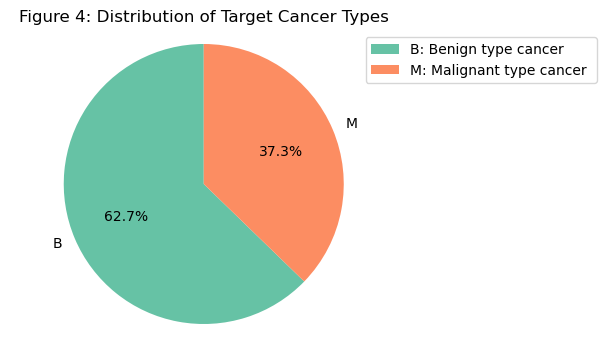

In [13]:

Target = data['diagnosis'].value_counts()
plt.figure(figsize=(5, 4))
plt.dpi = 150
plt.pie(Target, labels=Target.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Figure 4: Distribution of Target Cancer Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.legend(['B: Benign type cancer ','M: Malignant type cancer '],loc="best",bbox_to_anchor=(0.9, 1))
plt.show()

In [14]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data['radius_mean'], data['texture_mean'], data['area_mean'], c=data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0))
# ax.set_xlabel('Radius Mean')
# ax.set_ylabel('Texture Mean')
# ax.set_zlabel('Area Mean')
# plt.show()

## Pair Plot for Mean Values of different parameters

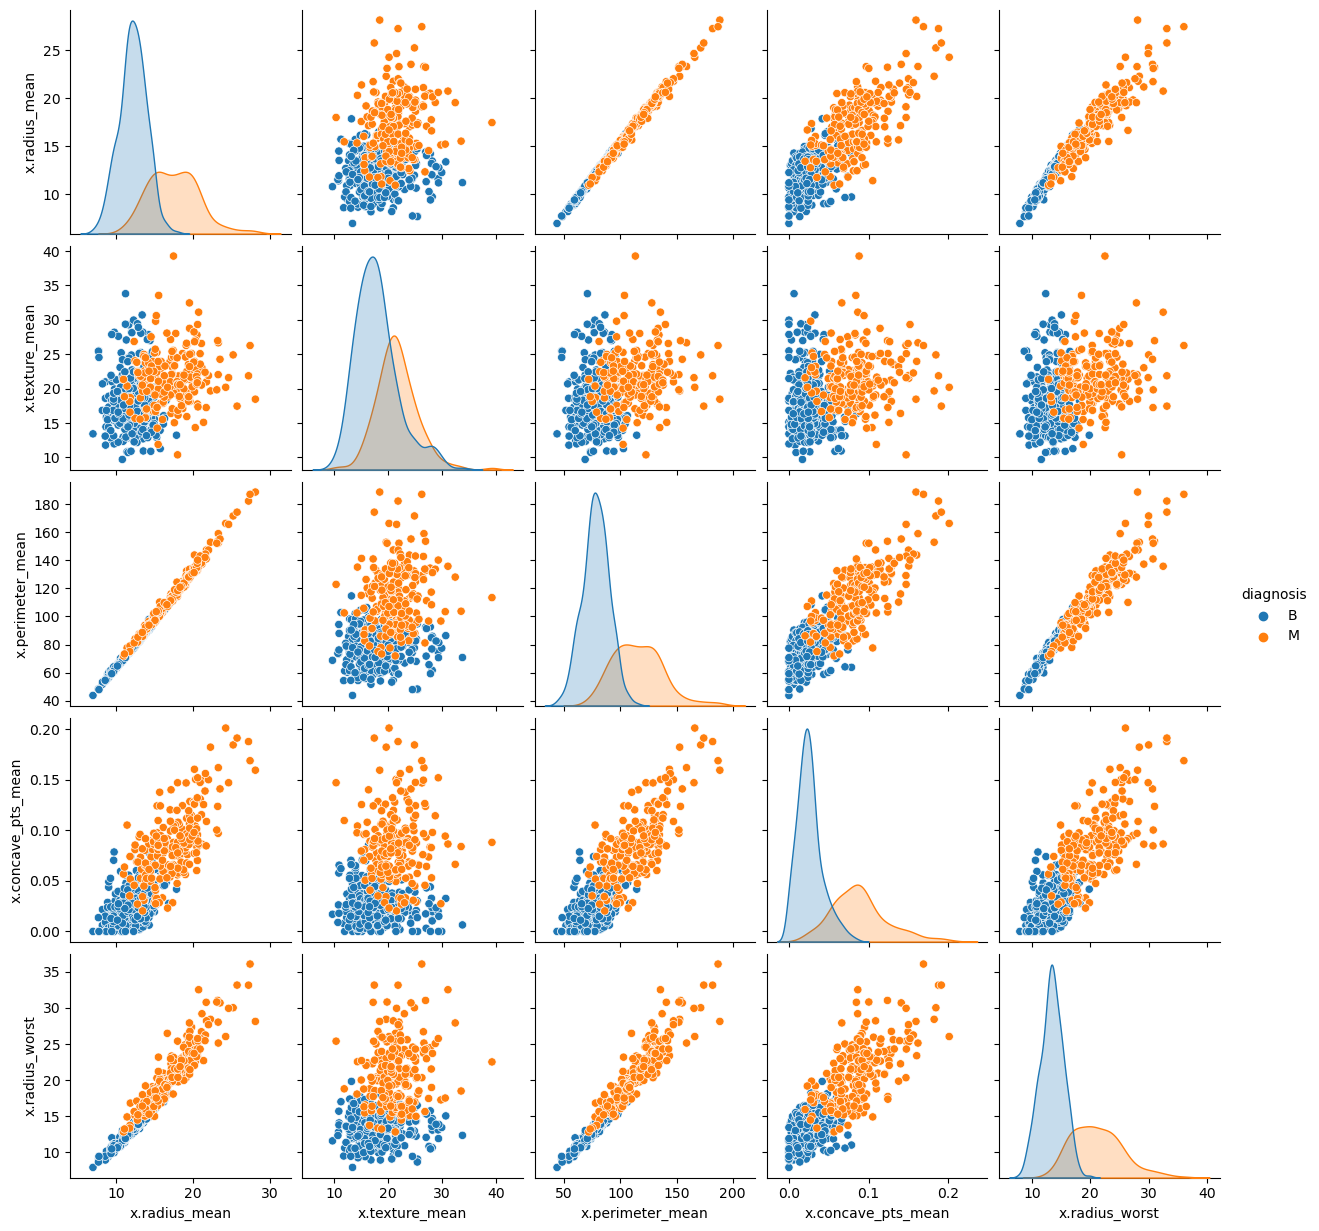

In [15]:
sns.pairplot(data[['diagnosis', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.concave_pts_mean', 'x.radius_worst']], hue='diagnosis') 
plt.show()

C:\Users\Uditya\AppData\Local\Temp\ipykernel_15896\3198908265.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



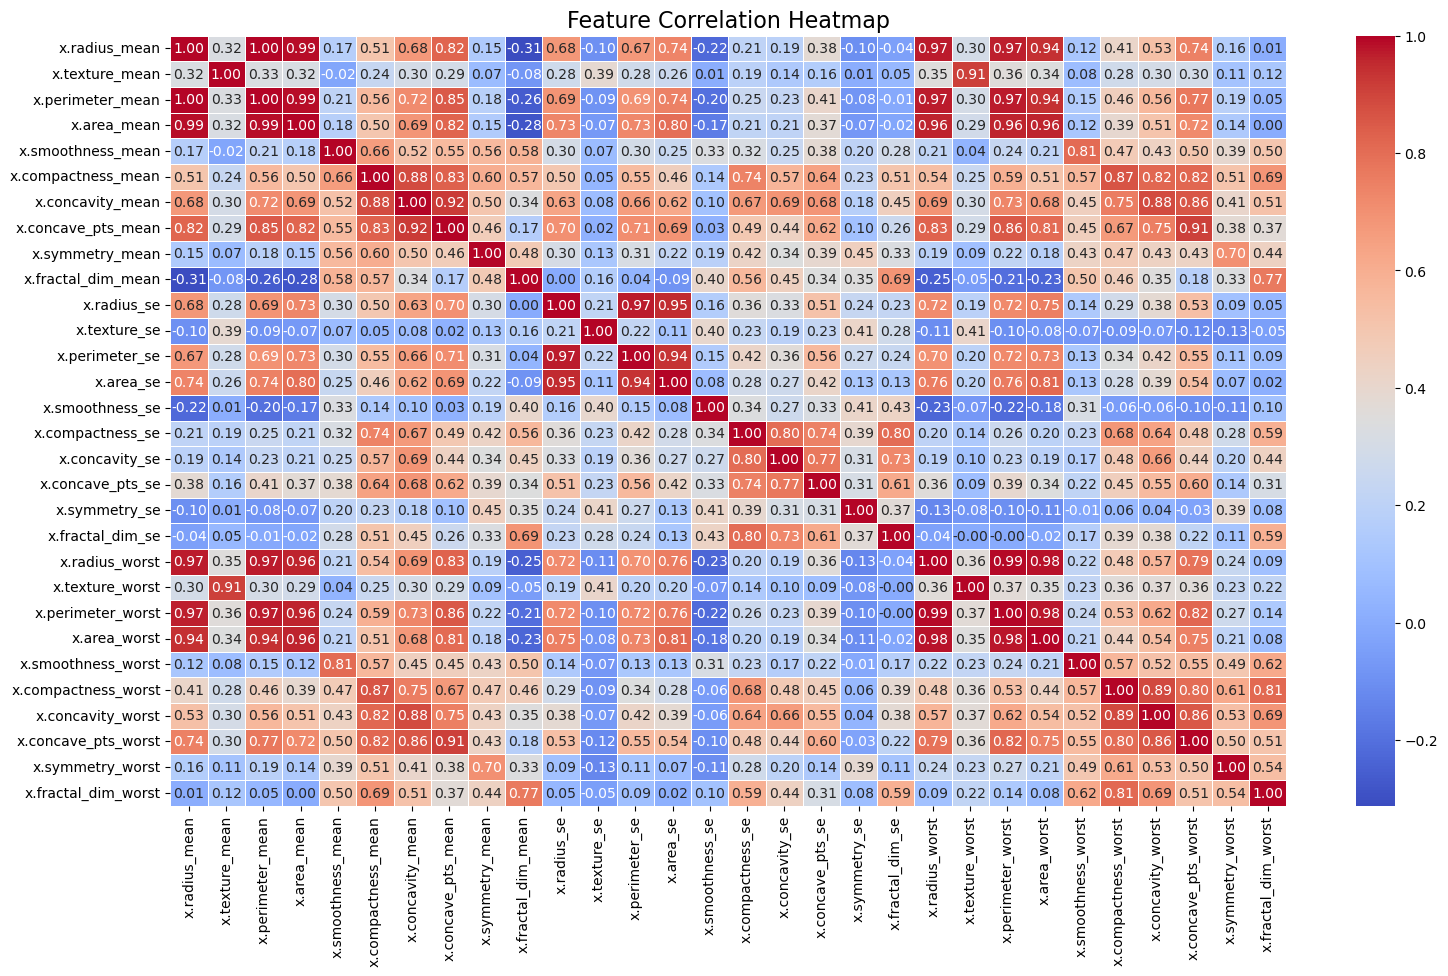

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(18, 10))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

# data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# # Drop any non-numeric columns if necessary
# data = data.drop(['id'], axis=1)

# # Calculate the correlation matrix
# correlation_matrix = data.corr()

# # Plot the heatmap
# plt.figure(figsize=(18, 10))  
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# plt.title("Feature Correlation Heatmap", fontsize=16)
# plt.show()


## Model prediction 

In [17]:
# Splitting data into features and target
X = data.drop(columns=['diagnosis']) 
y = data['diagnosis']                 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
def evaluate_models(data, target_column):
    
    # Splitting data into features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Splitting into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # Standardizing the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Defining models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier()
    }
    # creating the dataframe for the model name and accuracy
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'Model': model_name, 'Accuracy': accuracy*100})
    
    
    return pd.DataFrame(results)


In [19]:
data = pd.read_csv('data.csv')
results = evaluate_models(data, target_column = 'diagnosis')

In [20]:
results

Model    Accuracy
0     Logistic Regression   99.415205
1           Random Forest  100.000000
2  Support Vector Machine   99.415205
3     K-Nearest Neighbors   98.830409
4           Decision Tree  100.000000

## Plotting the Comparison graphs of different model 

In [21]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(15, 10))
# # plt.subplots(dpi = 150)

# models = results['Model']
# accuracies = results['Accuracy']

# sns.barplot(x="Accuracy", y="Model", data=results, palette="viridis")
# plt.title("Model Accuracy Comparison", fontsize=20)
# plt.xlabel("Accuracy (%)", fontsize=20)
# plt.ylabel("Model", fontsize=20)
# for i, acc in enumerate(accuracies):
#         plt.text(acc + 1, i, f"{acc:.2f}%", va='center', fontsize=16)  # Adjust text position based on xlim

# plt.tight_layout()  
# plt.show()

In [22]:
def plot_accuracy_graph(results):
    models = results['Model']
    accuracies = results['Accuracy']

    plt.figure(figsize=(15, 8))
    plt.barh(models, accuracies, color='gray', edgecolor='black')

    plt.title("Model Accuracy Comparison", fontsize=20)
    plt.xlabel("Accuracy (%)", fontsize=20)
    plt.ylabel("Model", fontsize=20)

    for i, acc in enumerate(accuracies):
        plt.text(acc + 1, i, f"{acc:.2f}%", va='center', fontsize=15) 
        
    plt.tight_layout()
    plt.show()


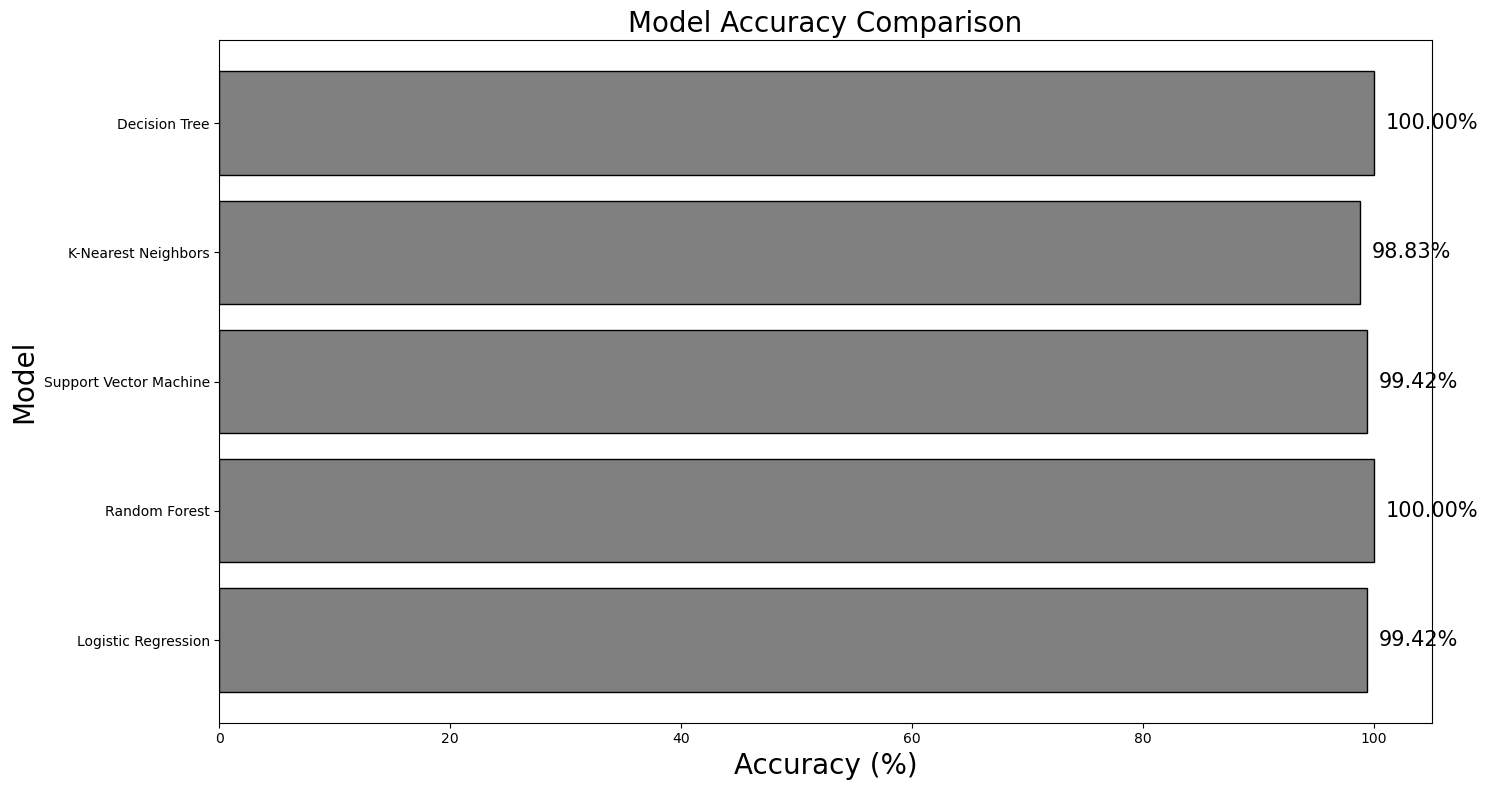

In [23]:
plot_accuracy_graph(results)

## Model on the Random Forest Classifiction

In [24]:
def random_forest_predict_breast_cancer(data_path, target_column):
    # Load the dataset
    data = pd.read_csv('data.csv')
    
    if data.isnull().sum().sum() > 0:
        data = data.dropna() 

    # Separate features and target
    X = data.drop(columns=[target_column]) 
    y = data[target_column]                 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy*100)
    print("\nClassification Report:\n", class_report)
    print("\nConfusion Matrix:\n", conf_matrix)

    return {
        "accuracy": accuracy*100,
        "classification_report": class_report,
        "confusion_matrix": conf_matrix
    }


In [25]:
results = random_forest_predict_breast_cancer(data_path='data.csv', target_column='diagnosis')

print("Model Accuracy:", results['accuracy'])

Accuracy: 99.12280701754386

Classification Report:
               precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Confusion Matrix:
 [[71  0]
 [ 1 42]]
Model Accuracy: 99.12280701754386


In [26]:
# Initialize lists to store training and testing scores
train_scores = []
test_scores = []

# Define the range of values for `n_estimators` (number of trees)
values = [i for i in range(1,1000,30)]

for i in values:
    # Initialize the Random Forest model with n_estimators as `i`
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict on the training data and calculate training accuracy
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    
    # Predict on the testing data and calculate testing accuracy
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    
    # Append accuracies to the respective lists
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    
    # Print the results for each value of n_estimators
    print('>>%d, train: %.3f, test: %.3f' % (i, train_acc*100, test_acc*100))


>>1, train: 96.734, test: 92.398
>>31, train: 100.000, test: 96.491
>>61, train: 100.000, test: 97.661
>>91, train: 100.000, test: 97.076
>>121, train: 100.000, test: 97.076
>>151, train: 100.000, test: 97.076
>>181, train: 100.000, test: 97.076
>>211, train: 100.000, test: 97.076
>>241, train: 100.000, test: 97.076
>>271, train: 100.000, test: 97.076
>>301, train: 100.000, test: 97.661
>>331, train: 100.000, test: 97.661
>>361, train: 100.000, test: 97.076
>>391, train: 100.000, test: 97.076
>>421, train: 100.000, test: 97.076
>>451, train: 100.000, test: 97.076
>>481, train: 100.000, test: 97.076
>>511, train: 100.000, test: 97.076
>>541, train: 100.000, test: 97.076
>>571, train: 100.000, test: 97.076
>>601, train: 100.000, test: 97.076
>>631, train: 100.000, test: 97.076
>>661, train: 100.000, test: 97.076
>>691, train: 100.000, test: 97.076
>>721, train: 100.000, test: 97.076
>>751, train: 100.000, test: 97.076
>>781, train: 100.000, test: 97.076
>>811, train: 100.000, test: 97.07

## Model Performence before Hyperparameter Tuning 

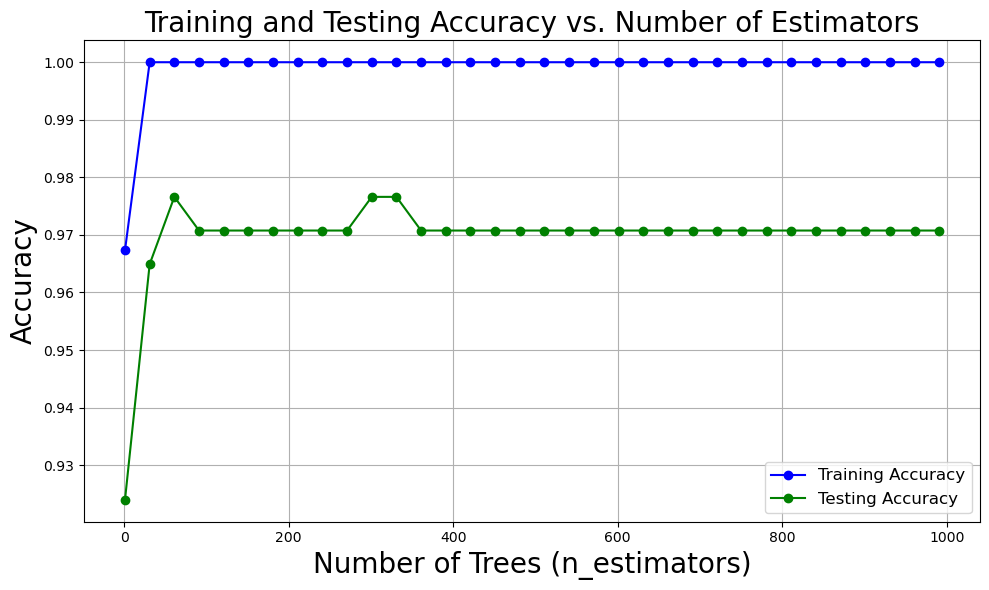

In [27]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(values, train_scores, label="Training Accuracy", marker='o', color='blue')
plt.plot(values, test_scores, label="Testing Accuracy", marker='o', color='green')
plt.title('Training and Testing Accuracy vs. Number of Estimators', fontsize=20)

plt.xlabel("Number of Trees (n_estimators)", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## Model Performence After Hyperparameter Tuning 

In [28]:
# Initialize lists to store training and testing scores
train_scores = []
test_scores = []

# Define ranges for hyperparameters
n_estimators_values = [i for i in range(50, 200, 50)]  # Number of trees
max_depth_values = [5, 10, 15, 20, None]  # Depth of trees
min_samples_split_values = [2, 5, 10]  # Minimum samples to split a node
min_samples_leaf_values = [1, 2, 5]  # Minimum samples at leaf node

# Best score and hyperparameters
best_test_score = 0
best_params = {}

# Loop through each combination of hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                # Initialize the Random Forest model with hyperparameters
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42,
                )

                # Fit the model to the training data
                model.fit(X_train, y_train)

                # Predict on the training data and calculate training accuracy
                train_yhat = model.predict(X_train)
                train_acc = accuracy_score(y_train, train_yhat)

                # Predict on the testing data and calculate testing accuracy
                test_yhat = model.predict(X_test)
                test_acc = accuracy_score(y_test, test_yhat)

                # Append accuracies to the respective lists
                train_scores.append(train_acc)
                test_scores.append(test_acc)

                # Print results for each combination
                print(
                    f"n_estimators={n_estimators}, max_depth={max_depth}, "
                    f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, "
                    f"train_acc={train_acc:.3f}, test_acc={test_acc:.3f}"
                )

                # Update the best parameters if test accuracy improves
                if test_acc > best_test_score:
                    best_test_score = test_acc
                    best_params = {
                        "n_estimators": n_estimators,
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf,
                    }

# Print the best hyperparameters and corresponding test score
print(f"Best Parameters: {best_params}")
print(f"Best Test Accuracy: {best_test_score:.3f}")


n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=1, train_acc=0.990, test_acc=0.965
n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=2, train_acc=0.990, test_acc=0.959
n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=5, train_acc=0.977, test_acc=0.971
n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=1, train_acc=0.990, test_acc=0.965
n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=2, train_acc=0.990, test_acc=0.971
n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=5, train_acc=0.977, test_acc=0.971
n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=1, train_acc=0.990, test_acc=0.971
n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=2, train_acc=0.985, test_acc=0.965
n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5, train_acc=0.977, test_acc=0.971
n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1

n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=2, train_acc=0.985, test_acc=0.965
n_estimators=100, max_depth=20, min_samples_split=10, min_samples_leaf=5, train_acc=0.977, test_acc=0.959
n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, train_acc=1.000, test_acc=0.965
n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=2, train_acc=0.992, test_acc=0.965
n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=5, train_acc=0.977, test_acc=0.959
n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=1, train_acc=0.992, test_acc=0.977
n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=2, train_acc=0.992, test_acc=0.959
n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=5, train_acc=0.977, test_acc=0.959
n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=1, train_acc=0.990, test_acc=0.971
n_estimators=100, max_depth=None, min_

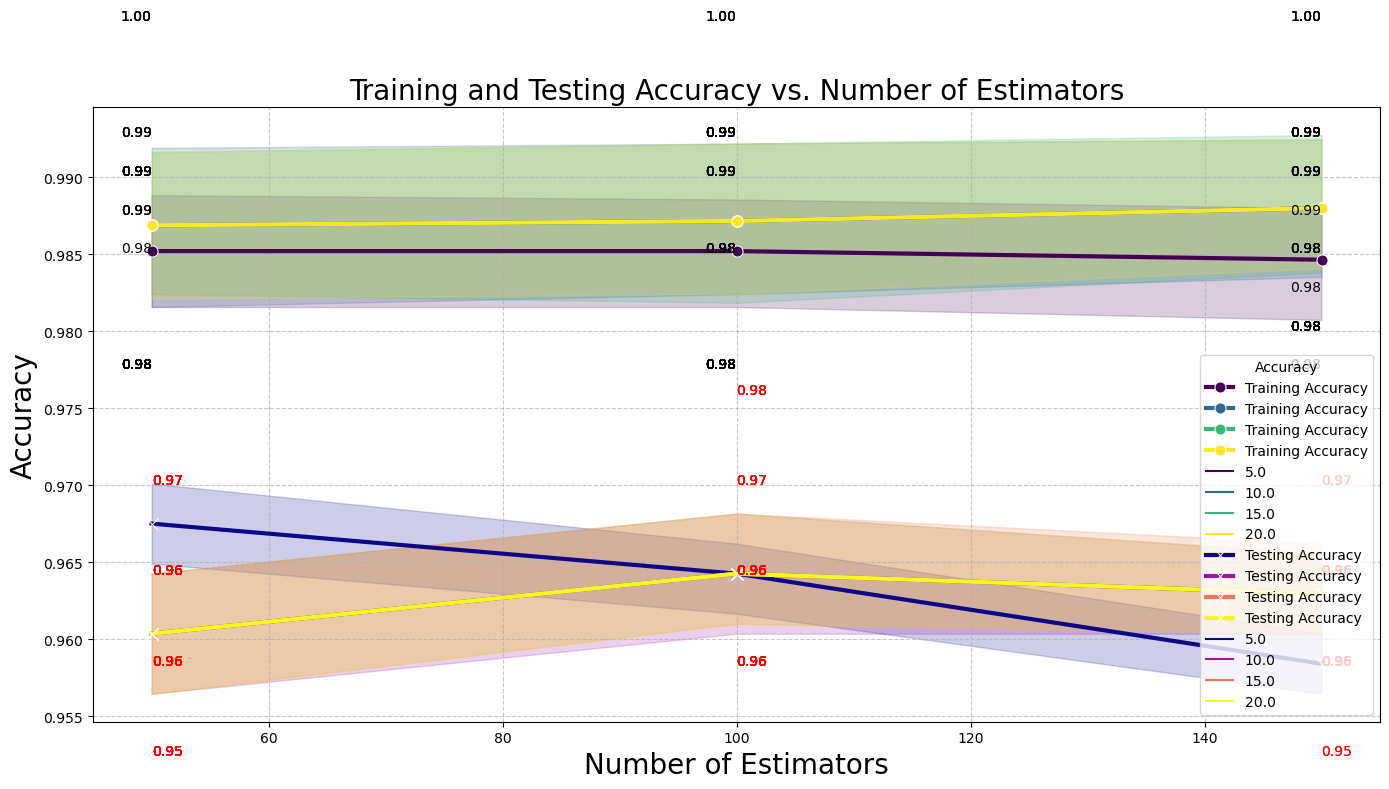

In [29]:
results = []

param_combinations = [
    (n_estimators, max_depth, min_samples_split, min_samples_leaf)
    for n_estimators in n_estimators_values
    for max_depth in max_depth_values
    for min_samples_split in min_samples_split_values
    for min_samples_leaf in min_samples_leaf_values
]

# Populate the results DataFrame with hyperparameters and their respective scores
for i, (n_estimators, max_depth, min_samples_split, min_samples_leaf) in enumerate(param_combinations):
    results.append({
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "train_accuracy": train_scores[i],
        "test_accuracy": test_scores[i],
    })

df_results = pd.DataFrame(results)

plt.figure(figsize=(14, 8))

sns.lineplot(data=df_results, x='n_estimators', y='train_accuracy', hue='max_depth', marker='o', palette='viridis', linewidth=3, markersize=8, label='Training Accuracy')

sns.lineplot(data=df_results, x='n_estimators', y='test_accuracy', hue='max_depth', marker='x', palette='plasma', linewidth=3, markersize=8, label='Testing Accuracy')

for i in range(len(df_results)):
    plt.text(df_results['n_estimators'][i], df_results['train_accuracy'][i], f"{df_results['train_accuracy'][i]:.2f}",
             color='black', fontsize=10, ha='right', va='bottom')

for i in range(len(df_results)):
    plt.text(df_results['n_estimators'][i], df_results['test_accuracy'][i], f"{df_results['test_accuracy'][i]:.2f}",
             color='red', fontsize=10, ha='left', va='top')

# Title and labels
plt.title('Training and Testing Accuracy vs. Number of Estimators', fontsize=20)
plt.xlabel('Number of Estimators', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

# Legend and grid
plt.legend(title="Accuracy", loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [30]:
depth = range(1, 5)  # Define depth range to iterate through

for d in depth:
    print('Depth = ' + str(d))
    
    # Initialize the Random Forest model with max_depth as `d`
    rf_model = RandomForestClassifier(max_depth=d, random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)  # Train the model
    
    # Predict on the training data
    rf_train_predict = rf_model.predict(X_train)
    rf_train_report = classification_report(y_train, rf_train_predict)
    print("Training Classification Report:")
    print(rf_train_report)
    
    # Predict on the testing data
    rf_test_predict = rf_model.predict(X_test)
    rf_test_report = classification_report(y_test, rf_test_predict)
    print("Testing Classification Report:")
    print(rf_test_report)
    print("-" * 50)  # Separator for better readability


Depth = 1
Training Classification Report:
              precision    recall  f1-score   support

           B       0.92      0.98      0.95       250
           M       0.96      0.86      0.91       148

    accuracy                           0.93       398
   macro avg       0.94      0.92      0.93       398
weighted avg       0.94      0.93      0.93       398

Testing Classification Report:
              precision    recall  f1-score   support

           B       0.89      0.99      0.94       107
           M       0.98      0.80      0.88        64

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.92      0.92      0.92       171

--------------------------------------------------
Depth = 2
Training Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.98      0.97       250
           M       0.96      0.93      0.95       148

    accuracy    

In [31]:
file_path = "data.csv"
df = pd.read_csv(file_path)


X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Convert target column (diagnosis) to integers
label_mapping = {"M": 0, "B": 1}
y = y.map(label_mapping)

# Check for missing or unmapped values
if y.isnull().any():
    raise ValueError("Some target labels in your dataset are not mapped correctly. Check your label_mapping.")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = (accuracy_score(y_test, y_pred))*100
print(f"Model Accuracy: {accuracy:.5f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

# Function to predict based on user input
def predict_breast_cancer(input_features):
    prediction = clf.predict([input_features])
    return "Malignant (Cancerous)" if prediction[0] == 0 else "Benign (Non-Cancerous)"

# Example user input
user_input = np.array([17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                       1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                       25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189,0.345])
result = predict_breast_cancer(user_input)
print(f"\nPrediction: The person has {result}")


Model Accuracy: 99.12281

Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      0.98      0.99        43
      Benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Prediction: The person has Benign (Non-Cancerous)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [32]:
# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path)

# Split features and target variable
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Convert target column (diagnosis) to integers
label_mapping = {"M": 0, "B": 1}
y = y.map(label_mapping)

# Check for missing or unmapped values
if y.isnull().any():
    raise ValueError("Some target labels in your dataset are not mapped correctly. Check your label_mapping.")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)  # KNN with k=5
}

# Example user input
user_input = np.array([17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                       1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                       25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189, 0.345])

# Function to predict based on user input
def predict_breast_cancer(input_features, model):
    prediction = model.predict([input_features])
    return "Malignant (Cancerous)" if prediction[0] == 0 else "Benign (Non-Cancerous)"

# Evaluate each model and make predictions
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))
    
    # Make a prediction using user input
    result = predict_breast_cancer(user_input, model)
    print(f"Prediction with {model_name}: The person has {result}")
    print("\n")


--- Logistic Regression ---


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      1.00      1.00        43
      Benign       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Prediction with Logistic Regression: The person has Benign (Non-Cancerous)


--- Decision Tree ---
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      1.00      1.00        43
      Benign       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Prediction with Decision Tree: The person has Benign (Non-Cancerous)


--- Random Forest ---
Accuracy: 99.12%
Classification Report:
              precision    recal

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



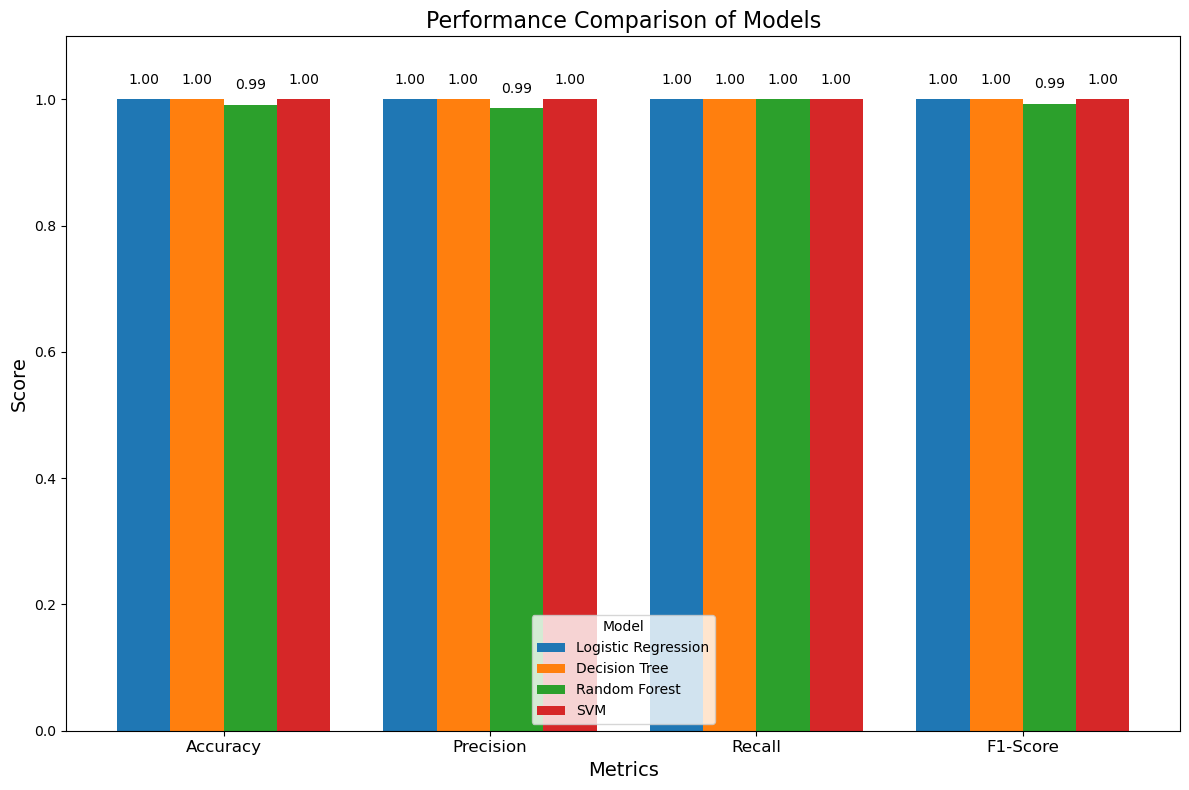

In [33]:
# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path)

# Split features and target variable
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Convert target column (diagnosis) to integers
label_mapping = {"M": 0, "B": 1}
y = y.map(label_mapping)

# Check for missing or unmapped values
if y.isnull().any():
    raise ValueError("Some target labels in your dataset are not mapped correctly. Check your label_mapping.")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Store metrics for comparison
comparison_data = []

# Evaluate each model and make predictions
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results to comparison data
    comparison_data.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Convert to DataFrame for visualization
comparison_df = pd.DataFrame(comparison_data)

# Function to create a comparison graph
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(comparison_df):
    # Define metrics and models
    metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
    models = comparison_df["Model"].tolist()
    
    # Data for plotting
    scores = comparison_df[metrics].values
    num_models = len(models)
    num_metrics = len(metrics)
    
    # Bar width and positions
    bar_width = 0.2
    positions = np.arange(num_metrics)
    
    # Initialize the figure
    plt.figure(figsize=(12, 8))
    
    # Plot bars for each model
    for i, (model, model_scores) in enumerate(zip(models, scores)):
        plt.bar(positions + i * bar_width, model_scores, bar_width, label=model)
    
    # Add labels and title
    plt.title("Performance Comparison of Models", fontsize=16)
    plt.ylabel("Score", fontsize=14)
    plt.xlabel("Metrics", fontsize=14)
    plt.xticks(positions + (num_models - 1) * bar_width / 2, metrics, fontsize=12)
    plt.ylim(0, 1.1)
    
    # Add legend
    plt.legend(title="Model", loc="lower center", fontsize=10)
    
    # Add text annotations for the scores
    for i, model_scores in enumerate(scores):
        for j, score in enumerate(model_scores):
            plt.text(positions[j] + i * bar_width, score + 0.02, f"{score:.2f}", 
                     ha='center', va='bottom', fontsize=10)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


# Plot the comparison graph
plot_comparison(comparison_df)
